# Classwork

Implement a Newton optimization method via line search (it can be Golden Section Search or Bisection Search), taking into account the following:

1. The Rosenbrock function will be the function to optimize as given in class.
2. The value of n is fixed at $n=10^6$.
3. Compare the results in terms of accuracy and execution times between the exact Newton’s step and the approximate Newton’s step (by approximating the gradient and Hessian matrix using finite differences).
4. comment as needed.

In [1]:
import time as ti
import sympy as sp
import numpy as np
import scipy.sparse as spa
import scipy.sparse.linalg as las
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import display, Math
import matplotlib.pyplot as plt
import seaborn as sns

### Rosenbrock

In [9]:
def fun_f_a(x,n):
  f = np.sum([100*(x[i+1]-x[i]**2)**2+(x[i]-1)**2 for i in range(0,n-1)])
  return f

def fun_g_a(x,n):
  g = np.zeros(n)
  g[1:] = -200*np.power(x[:-1],2)
  g[:-1]+=-400*x[:-1]*(-np.power(x[:-1],2)+x[1:])
  g[1:-1]+=202*x[1:-1]
  g[0]+=2*x[0]
  g[-1]+=200*x[-1]
  g[:-1]+=-2
  return g

def fun_H_a(x,n):
  ds = np.array([-400*x[i] for i in range(0,n-1)])
  dp = np.zeros(n)
  dp[:-1] = np.array([1200*x[i]**2-400*x[i+1] for i in range(0,n-1)])
  dp[-1] = 200
  dp[1:-1]+=202
  dp[0]+=2
  ind = np.arange(0,n)
  I = np.concatenate((ind,ind[:-1],ind[:-1]+1))
  J = np.concatenate((ind,ind[:-1]+1,ind[:-1]))
  V = np.concatenate((dp,ds,ds))
  H = spa.coo_matrix((V,(I,J)))
  return H

In [10]:
def alpha_estimate_spa(xk,d_k,M):
  a = 0; b = 1; n = len(xk)
  for k in range(0,M):
    alp = np.linspace(a,b,num=5,endpoint=True)
    alp1 = alp[1]
    alp2 = alp[2]
    alp3 = alp[3]
    xk1 = xk+alp1*d_k
    xk2 = xk+alp2*d_k
    xk3 = xk+alp3*d_k
    f1 = fun_f_a(xk1,n)
    f2 = fun_f_a(xk2,n)
    f3 = fun_f_a(xk3,n)
    pos = np.argmin([f1,f2,f3])+1
    a = alp[pos-1]
    b = alp[pos+1]
  return (a+b)/2

In [16]:
n = 10**6
xk = 5*np.ones(n)
times_k = []
norm_gk = []
for k in range(0,50):
  Hk = fun_H_a(xk,n)
  gk = fun_g_a(xk,n)
  norm_gk.append(np.linalg.norm(gk))
  ini = ti.time()
  dxk = las.spsolve(Hk,-gk)
  fin = ti.time()
  times_k.append(fin-ini)
  alp_opt = alpha_estimate_spa(xk,dxk,20)
  xk = xk+alp_opt*dxk

print(norm_gk);

[36007986.44034315, 10635980.656702656, 3139947.2967211185, 911910.0513236929, 270795.8312239455, 69414.705805621, 27545.172346185904, 1942.2246700743626, 180.61049999822944, 3.0506540168825746, 25.283213638029512, 16.74501427436652, 19.018692981785136, 7.819419590837778, 12.109253319917466, 3.8883307688819966, 6.2746665135812485, 1.5904635882637723, 2.2202932837871225, 0.23607969066143158, 0.10890073185022496, 0.0006222669206139915, 8.979405100343146e-07, 6.135403835094991e-13, 1.2388735920980804e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


0.0


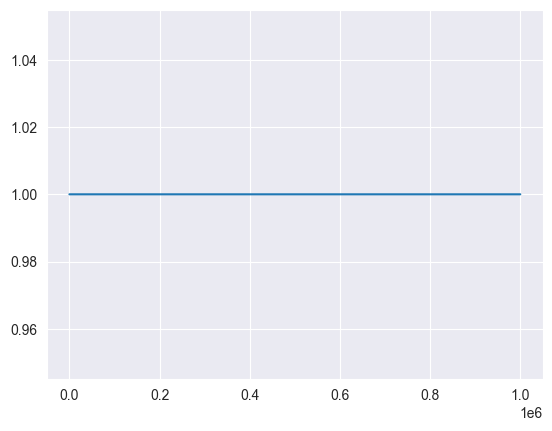

In [18]:
print(np.linalg.norm(np.ones(n)-xk))
plt.plot(xk);

/var/folders/4x/by41vdp921s318y3mybq7fb80000gn/T/ipykernel_62621/404796216.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(np.arange(0,50)),np.log10(norm_gk),lw=3,color='r')


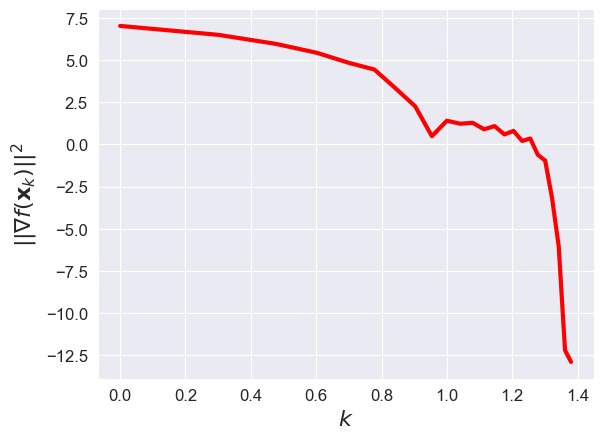

In [20]:
sns.set_style('darkgrid')
plt.plot(np.log10(np.arange(0,50)),np.log10(norm_gk),lw=3,color='r')
plt.xlabel('$k$',fontdict={'size':16})
plt.ylabel('$\\left || \\nabla f \\left ( {\\bf x}_k \\right ) \\right ||^2$',fontdict={'size':16})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

### finite diffences

In [ ]:
def finite_diff_grad(f, x, h=1e-5):
    n = len(x)
    grad = np.zeros(n)
    fx = f(x, n)  # make sure to pass 'n' as parameter
    for i in range(n):
        x[i] += h
        grad[i] = (f(x, n) - fx) / h  # make sure to pass 'n' as parameter
        x[i] -= h
    return grad

def finite_diff_hess(f, x, h=1e-5):
    n = len(x)
    hessian = np.zeros((n, n))
    for i in range(n):
        x[i] += h; fxi = f(x, n)  # make sure to pass 'n' as parameter
        for j in range(i, n):
            x[j] += h; fxij = f(x, n)  # make sure to pass 'n' as parameter
            if i == j:
                hessian[i, j] = (fxij - 2*fxi + f(x-h, n)) / h**2  # make sure to pass 'n' as parameter
            else:
                x[i] -= h; fxj = f(x, n)  # make sure to pass 'n' as parameter
                hessian[i, j] = hessian[j, i] = (fxij - fxi - fxj + f(x-h, n)) / (2*h**2)  # make sure to pass 'n' as parameter
            x[j] -= h
        x[i] -= h
    return hessian

def newton_method(f, grad, hess, x0, alpha_search, tol=1e-6, max_iter=50):
    xk = x0.copy()
    norm_gk = []
    for _ in range(max_iter):
        gk = grad(f, xk)
        Hk = hess(f, xk)
        norm_gk.append(np.linalg.norm(gk))
        dxk = np.linalg.solve(Hk, -gk)
        alpha = alpha_search(xk, dxk, 20)  # Added max iterations for alpha search
        xk += alpha * dxk
        if np.linalg.norm(gk) < tol:
            break
    return xk, norm_gk